In [3]:
# IMPORTING REQUIRED PACKAGES
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC                            #svm = support vector model,..classifier
from sklearn import svm
from sklearn.neural_network import MLPClassifier      #multi layer prosonifier

#from sklearn.linear_model import SGDClassification

from sklearn.linear_model import LinearRegression #linear_model=family, LinearRegression=model->from sklearn.family import Model      

from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
%matplotlib inline                                

#seaborn & matplotlip it opens a new window to show the graphics

In [94]:
#loading dataset

ani = pd.read_csv('animal.csv')
ani
#ani = pd.read_excel('animal.xlsx', 'Sheet1')  or ani = pd.read_csv('animal.csv', ';')

,Unnamed: 0,animal,age,visits,priority
0,a,cat,9.6,1,yes
1,b,dog,3.0,4,yes
2,c,cat,4.0,6,yes
3,d,rat,NaN,2,no
4,e,fish,2.0,8,no


In [37]:
ani.head()

,Unnamed: 0,animal,age,visits,priority
0,a,cat,9.6,1,yes
1,b,dog,3.0,4,yes
2,c,cat,4.0,6,yes
3,d,rat,NaN,2,no
4,e,fish,2.0,8,no


In [38]:
ani.info()             #details of all the datatypes used

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  5 non-null      object 
 1   animal      5 non-null      object 
 2   age         4 non-null      float64
 3   visits      5 non-null      int64  
 4   priority    5 non-null      object 
dtypes: float64(1), int64(1), object(3)
memory usage: 328.0+ bytes


In [39]:
ani.isnull().sum()      #gives number of novalues(null NaN)

Unnamed: 0    0
animal        0
age           1
visits        0
priority      0
dtype: int64

In [40]:
#PREPROCESSING OF DATA

bins = (2, 6.5, 8)
group_names =['bad', 'good']
ani['visits'] = pd.cut(ani['visits'], bins = bins, labels = group_names)     #bins is an actual command
ani['visits'].unique()


[NaN, bad, good]
Categories (2, object): [bad < good]

In [43]:
label_visits = LabelEncoder()

In [50]:
#ani['visits'] = label_visits.fit_transform(ani['visits'])  #from sklearn.preprocessing import StandardScaler, LabelEncoder
ani.head()

,Unnamed: 0,animal,age,visits,priority
0,a,cat,9.6,NaN,yes
1,b,dog,3.0,bad,yes
2,c,cat,4.0,bad,yes
3,d,rat,NaN,NaN,no
4,e,fish,2.0,good,no


In [51]:
ani['visits'].value_counts()

bad     2
good    1
Name: visits, dtype: int64

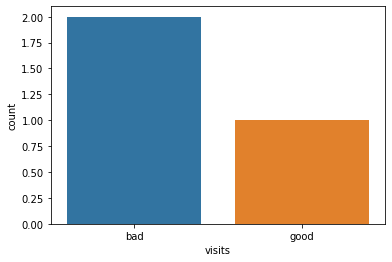

In [52]:
sns.countplot(ani['visits'])   #import seaborn as sns

In [73]:
#Seperate the database as response variable and feature variables
X = ani.drop('visits', axis=1) 
y = ani['visits']

In [74]:
#Train & Test splitting of data

X_train, X_test,y_train, y_test =train_test_split(X, y, test_size =0.2, random_state = 42) #from sklearn.model_selection import train_test_split
#(train set width, data that will bw tested with, visits/ the answer that we are looking for, to see how good our x_test does)

In [55]:
# Applying standard scaling to get optimizes result

sc = StandardScaler()        #from sklearn.preprocessing import StandardScaler, LabelEncoder
#X_train = sc.fit_transform(X_train)
#X_test = sc.transform(X_test)

In [56]:
X_train[:10]

,Unnamed: 0,animal,age,priority
4,e,fish,2.0,no
2,c,cat,4.0,yes
0,a,cat,9.6,yes
3,d,rat,NaN,no


# Random Forest Classifier(rfc)

In [65]:
rfc = RandomForestClassifier(n_estimators = 200) #from sklearn.ensemble import RandomForestClassifier,... n_estimator->how many models?
#rfc.fit(X_train, y_train)    #(featers, quality)
#pred_rfc =rfc.predict(X_test)

In [66]:
#pred_rfc[:20]

In [67]:
X_test[:20]

,Unnamed: 0,animal,age,priority
1,b,dog,3.0,yes


In [69]:
#to check how our model [performs]

#print(classification_report(y_test, pred_rfc))
#print(confusion_matrix(y_test, pred_rfc))

# SVM CLASSIFIER 
Good for small data, its faster.

In [80]:
clf = svm.SVC()
#clf.fit(X_train, y_train)
#pred_clf = clf.predict(X_test)




#to check how our model [performs]

#print(classification_report(y_test, pred_clf))
#print(confusion_matrix(y_test, pred_clf))

# Neural Network
text analysis

In [83]:
mlpc = MLPClassifier(hidden_layer_sizes =(11,11,11), max_iter = 500)      #MLPC= multie layer precptron classifier
                                                                          #iter-> iteration , default =200

In [85]:
#mlpc.fit(X_train, y_train)

#pred_mlpc = mlpc.predict(X_test)



#to check how our model [performs]

#print(classification_report(y_test, pred_mlpc))
#print(confusion_matrix(y_test, pred_mlpc))

In [89]:
from sklearn.metrics import accuracy_score
#cm = accuracy_score(y_test, pred_rfc)
#cm

In [90]:
ani.head(10)

,Unnamed: 0,animal,age,visits,priority
0,a,cat,9.6,NaN,yes
1,b,dog,3.0,bad,yes
2,c,cat,4.0,bad,yes
3,d,rat,NaN,NaN,no
4,e,fish,2.0,good,no


In [92]:
Xnew = [7, 8.7,0.27, 2.89]
#Xnew = sc.transform(Xnew)
#Ynew = rfc.predict(Xnew)
#Ynew